# NBA Player Distance

In [1]:
import pandas as pd
from nba_api.stats.endpoints import leaguedashptstats
import matplotlib.pyplot as plt

In [5]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

font_dirs = ['/fonts/']
font_files = fm.findSystemFonts(fontpaths=font_dirs)

font_path = 'fonts/JetBrainsMono.ttf'
prop = fm.FontProperties(fname=font_path)
print(prop.get_name())  # this prints the font's internal name

fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = prop.get_name()

# set font
plt.rcParams['font.family'] = 'JetBrains Mono'

JetBrains Mono


In [6]:
stats = leaguedashptstats.LeagueDashPtStats(
    per_mode_simple='Totals',
    player_or_team='Player',
    pt_measure_type='SpeedDistance'
)
df = stats.get_data_frames()[0]

In [7]:
marathon_dist = 26.219

df['DIST_MARATHONS'] = df.DIST_MILES / marathon_dist
df = df[df.DIST_MARATHONS > 1].sort_values(by='DIST_MILES', ascending=False)

df['MILES_PER_GAME'] = df.DIST_MILES / df.GP
df['MILES_PER_36'] = df.DIST_MILES / df.MIN * 36
df['MIN_PER_GAME'] = df.MIN / df.GP

In [8]:
df.sort_values(by='MILES_PER_36', ascending=False)

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,GP,W,L,MIN,DIST_FEET,DIST_MILES,DIST_MILES_OFF,DIST_MILES_DEF,AVG_SPEED,AVG_SPEED_OFF,AVG_SPEED_DEF,DIST_MARATHONS,MILES_PER_GAME,MILES_PER_36,MIN_PER_GAME
175,1627780,Gary Payton II,1610612744,GSW,56,33,23,830.0,377284,71.5,36.3,35.2,4.81,5.09,4.55,2.727030,1.276786,3.101205,14.821429
23,1641748,Andre Jackson Jr.,1610612749,MIL,60,34,26,915.0,414336,78.5,41.1,37.4,4.85,5.02,4.68,2.994012,1.308333,3.088525,15.250000
496,204456,T.J. McConnell,1610612754,IND,69,42,27,1252.0,566513,107.3,56.8,50.4,4.79,5.12,4.45,4.092452,1.555072,3.085304,18.144928
219,1631222,Jake LaRavia,1610612758,SAC,66,40,26,1349.0,606059,114.8,60.3,54.5,4.71,4.96,4.46,4.378504,1.739394,3.063603,20.439394
277,1630548,Johnny Juzang,1610612762,UTA,56,14,42,1044.0,468778,88.8,48.1,40.6,4.75,4.96,4.51,3.386857,1.585714,3.062069,18.642857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,101108,Chris Paul,1610612759,SAS,72,31,41,2019.0,692774,131.2,71.0,60.2,3.66,3.95,3.37,5.004005,1.822222,2.339376,28.041667
258,1628369,Jayson Tatum,1610612738,BOS,64,46,18,2315.0,785400,148.8,80.7,68.0,3.66,3.85,3.45,5.675274,2.325000,2.313952,36.171875
272,203954,Joel Embiid,1610612755,PHI,19,8,11,574.0,192256,36.4,18.8,17.7,3.55,3.67,3.44,1.388306,1.915789,2.282927,30.210526
237,201935,James Harden,1610612746,LAC,69,41,28,2424.0,803149,152.1,83.1,69.0,3.51,3.75,3.26,5.801137,2.204348,2.258911,35.130435


In [9]:
annt_x = float(df[df.PLAYER_ID == 201599].MIN_PER_GAME)
annt_y = float(df[df.PLAYER_ID == 201599].MILES_PER_36)

/var/folders/2p/l_6wwc653kn38c5ng_dn2pnm0000gn/T/ipykernel_24291/1746126086.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  annt_x = float(df[df.PLAYER_ID == 201599].MIN_PER_GAME)
/var/folders/2p/l_6wwc653kn38c5ng_dn2pnm0000gn/T/ipykernel_24291/1746126086.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  annt_y = float(df[df.PLAYER_ID == 201599].MILES_PER_36)


In [10]:
import matplotlib.pyplot as plt

Text(8.244897959183673, 2.338, 'DeAndre Jordan')

<Figure size 1000x1000 with 0 Axes>

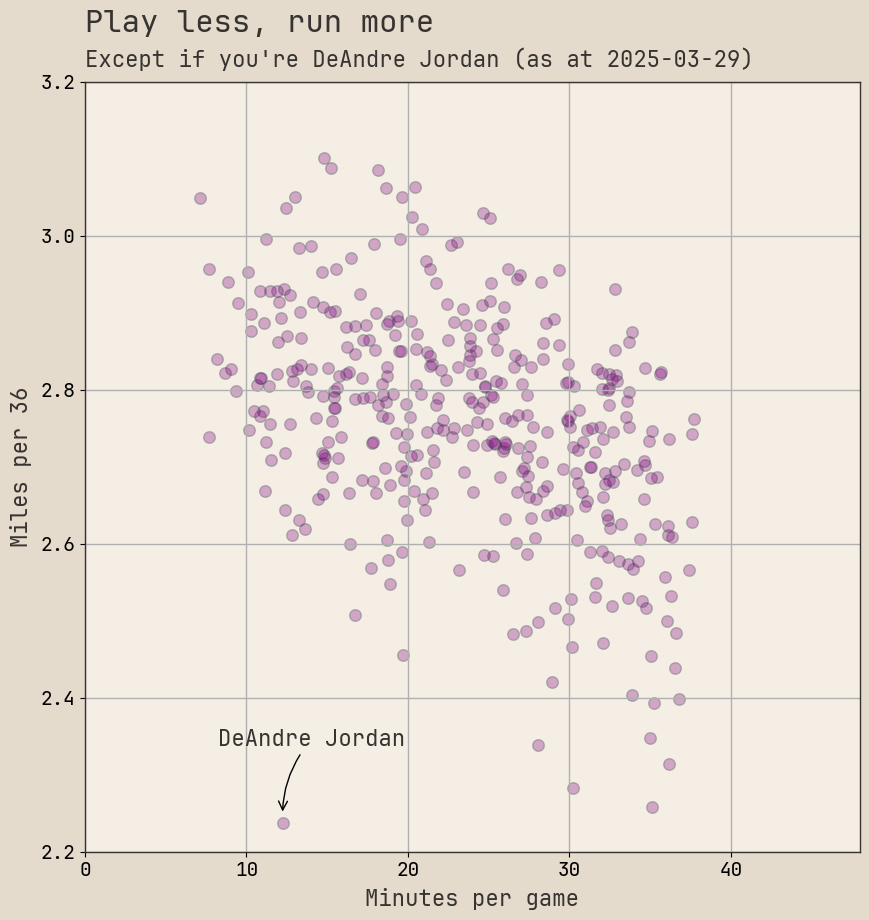

In [17]:
plt.style.use('./site.mplstyle')

plt.figure()
ec='#2A4644'

df.plot.scatter(x="MIN_PER_GAME", y="MILES_PER_36",
                title="Play less, run more",
                xlim=(0,48),
                ylim=(2.2,3.2),
                xlabel="Minutes per game",
                ylabel="Miles per 36",
                fc='purple',
                s=70,
                ec=ec,
                alpha=0.30)

plt.suptitle("Except if you're DeAndre Jordan (as at 2025-03-29)", 
             fontsize=16, 
             y=0.915, 
             x=0.459)

plt.annotate('DeAndre Jordan',
             xy=(annt_x, annt_y),
             fontsize=16,
             xytext=(annt_x-4, annt_y+0.1),
             arrowprops=dict(arrowstyle='->',
                             color='black',
                             shrinkB=8,
                             connectionstyle='arc3,rad=0.2'))

In [111]:
json_data = df[["PLAYER_NAME", "AVG_SPEED_OFF","AVG_SPEED_DEF"]].to_json(orient="records")

with open("speed_data.json", "w") as f:
  f.write(json_data)